# Prepare plots for graphs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import pickle

def plot_graph(group, numbers, x_axis, save_file, metric, minimum, maximum):
    # Bar width for plotting
    bar_width = 0.15
    index = np.arange(len(x_axis))
    
    # Colors for the bars
    colors = ['blue', 'green', 'red', 'orange']  # Modify as needed

    # Set up the figure and axis
    fig, ax = plt.subplots()
    lower_bounds , upper_bounds = [], []
    for idx, type_name in enumerate(group[0]):
        # Extract values and compute means
        means = [np.mean(numbers[j][idx]) for j in range(len(x_axis))]
        # Compute standard errors
        standard_errors = [stats.sem(numbers[j][idx]) for j in range(len(x_axis))]

        # Plot bars with standard error bars
        ax.bar(index + idx * bar_width, means, bar_width, alpha=0.5, label=type_name, yerr=standard_errors, capsize=5, color=colors[idx], ecolor=colors[idx])

    # Some aesthetics for the plot
    ax.set_xlabel('models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_xticks(index + bar_width * (len(group[0]) - 1) / 2)
    ax.set_xticklabels(x_axis, fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim([minimum,maximum])  # Adjust the y-axis limit to accommodate the means and SE

    plt.tight_layout()
    plt.savefig(save_file, dpi=1200)
    plt.show()


## Opening the neccessary files

In [3]:

def opening_pickle_file(name):
    '''
    This opens the specified pickle file under "scores" folder
    '''
    print("Opening file:",name)
    with open(f"scores/{name}", 'rb') as file:
        data = pickle.load(file)
    return(data)
def get_baseline_comb(outcome):
    '''
    This extracts the AUROC and AUPRC for the best performing baseline model. 
    '''
    # Define the models to consider
    models = ['cbow', 'doc2vec', 'fasttext', 'glove']
    best_mean_auprc = 0
    best_aurocs = []
    best_auprcs = []
    
    # Iterate over the models to find the one with the best AUPRC mean
    for model in models:
        # Get the lists of AUROCs and AUPRCs from the pickle files
        aurocs = opening_pickle_file(f"baseline/{model}_{outcome}.pickle")[0]
        auprcs = opening_pickle_file(f"baseline/{model}_{outcome}.pickle")[1]
        # Calculate the mean AUPRC for the current model
        current_mean_auprc = np.mean(auprcs)
        
        # If the current mean AUPRC is the best so far, update the best lists
        if current_mean_auprc > best_mean_auprc:
            best_mean_auprc = current_mean_auprc
            best_aurocs = aurocs
            best_auprcs = auprcs

    # Return the AUROCs and AUPRCs for the model with the best AUPRC mean
    return (best_aurocs, best_auprcs)
    
baseline_death_auroc,baseline_death_auprc=get_baseline_comb("death_in_30")

Opening file: baseline/cbow_death_in_30.pickle
Opening file: baseline/cbow_death_in_30.pickle
Opening file: baseline/doc2vec_death_in_30.pickle
Opening file: baseline/doc2vec_death_in_30.pickle
Opening file: baseline/fasttext_death_in_30.pickle
Opening file: baseline/fasttext_death_in_30.pickle
Opening file: baseline/glove_death_in_30.pickle
Opening file: baseline/glove_death_in_30.pickle


In [4]:
def get_file(ttype,model,outcome):
    '''
    This extracts the AUPRC and AUROC scores across the five folds for the specified model and its associated outcome
    '''
    d=opening_pickle_file(f"{ttype}/{model}/{outcome}.pickle")
    return(d["auroc"],d["auprc"])

bioClinicalBERT_unsup_death_in_30_auroc,bioClinicalBERT_unsup_death_in_30_auprc=get_file("self_supervised","bioClinicalBERT","death_in_30")
ClinicalBERT_unsup_death_in_30_auroc,ClinicalBERT_unsup_death_in_30_auprc=get_file("self_supervised","clinicalBERT","death_in_30")
bioGPT_unsup_death_in_30_auroc,bioGPT_unsup_death_in_30_auprc=get_file("self_supervised","bioGPT","death_in_30")



Opening file: self_supervised/bioClinicalBERT/death_in_30.pickle
Opening file: self_supervised/clinicalBERT/death_in_30.pickle
Opening file: self_supervised/bioGPT/death_in_30.pickle


In [5]:
def get_pretrained(ttype,model,outcome):
    '''
    This extracts the AUPRC and AUROC scores across the five folds for the specified model and its associated outcome
    Note that for this AUROC is index 0 and AUPRC is index 1
    '''
    d=opening_pickle_file(f"{ttype}/{model}_{outcome}.pickle")
    return(d[0],d[1])


bioClinicalBERT_pretrained_death_in_30_auroc,bioClinicalBERT_pretrained_death_in_30_auprc=get_pretrained("pretrained","bioClinicalBERT","death_in_30")
ClinicalBERT_pretrained_death_in_30_auroc,ClinicalBERT_pretrained_death_in_30_auprc=get_pretrained("pretrained","clinicalBERT","death_in_30")
bioGPT_pretrained_death_in_30_auroc,bioGPT_pretrained_death_in_30_auprc=get_pretrained("pretrained","bioGPT","death_in_30")


Opening file: pretrained/bioClinicalBERT_death_in_30.pickle
Opening file: pretrained/clinicalBERT_death_in_30.pickle
Opening file: pretrained/bioGPT_death_in_30.pickle


In [6]:
bioClinicalBERT_semi_sup_death_in_30_auroc,bioClinicalBERT_semi_sup_death_in_30_auprc=get_file("Semi-supervised","bioClinicalBERT","death_in_30")
ClinicalBERT_semi_sup_death_in_30_auroc,ClinicalBERT_semi_sup_death_in_30_auprc=get_file("Semi-supervised","clinicalBERT","death_in_30")
bioGPT_semi_sup_death_in_30_auroc,bioGPT_semi_sup_death_in_30_auprc=get_file("Semi-supervised","bioGPT","death_in_30")

Opening file: Semi-supervised/bioClinicalBERT/death_in_30.pickle
Opening file: Semi-supervised/clinicalBERT/death_in_30.pickle
Opening file: Semi-supervised/bioGPT/death_in_30.pickle


In [7]:
bioClinicalBERT_MTL_death_in_30_auroc,bioClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","bioClinicalBERT","death_in_30")
ClinicalBERT_MTL_death_in_30_auroc,ClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","clinicalBERT","death_in_30")
bioGPT_MTL_death_in_30_auroc,bioGPT_MTL_death_in_30_auprc=get_file("MTL","bioGPT","death_in_30")

Opening file: MTL/bioClinicalBERT/death_in_30.pickle
Opening file: MTL/clinicalBERT/death_in_30.pickle
Opening file: MTL/bioGPT/death_in_30.pickle


# Plot the graphs

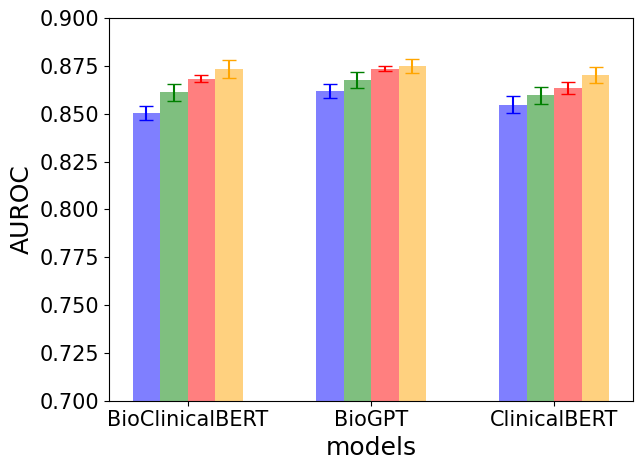

In [9]:
# define the x-axis and different groups to be plotted
x_axis=["BioClinicalBERT","BioGPT","ClinicalBERT"]
group=[["pre-trained","finetuning","semi-supervised","foundational"] for i in range(len(x_axis))]

# define the save_file
save_file="death_in_30_AUROC.jpg"
# define the metric (note this is also the y axis)
metric="AUROC"

# define the bars to be plotted (outer list is the model type -- bioClinicalBERT, bioGPT, and ClinicalBERT; inner list is the different finetuning strategies)
numbers=[[bioClinicalBERT_pretrained_death_in_30_auroc,bioClinicalBERT_unsup_death_in_30_auroc,bioClinicalBERT_semi_sup_death_in_30_auroc,
         bioClinicalBERT_MTL_death_in_30_auroc],
         [bioGPT_pretrained_death_in_30_auroc,bioGPT_unsup_death_in_30_auroc,bioGPT_semi_sup_death_in_30_auroc,
         bioGPT_MTL_death_in_30_auroc],
         [ClinicalBERT_pretrained_death_in_30_auroc,ClinicalBERT_unsup_death_in_30_auroc,ClinicalBERT_semi_sup_death_in_30_auroc,
         ClinicalBERT_MTL_death_in_30_auroc]]
         
plot_graph(group,numbers,x_axis, save_file, metric,0.7,0.9)

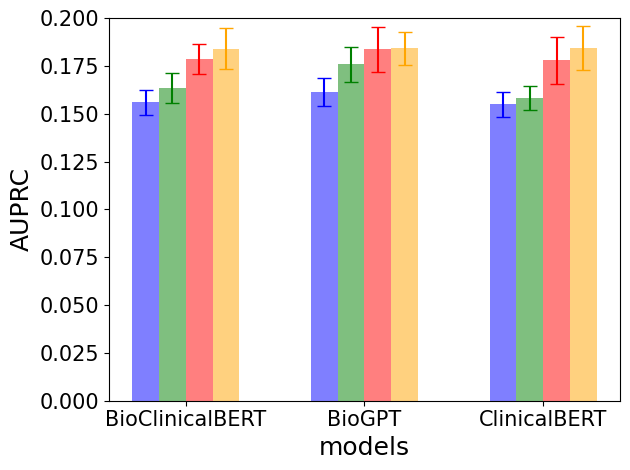

In [10]:
metric="AUPRC"
title="death_in_30_AUPRC.jpg"
numbers=[[bioClinicalBERT_pretrained_death_in_30_auprc,bioClinicalBERT_unsup_death_in_30_auprc,bioClinicalBERT_semi_sup_death_in_30_auprc,
         bioClinicalBERT_MTL_death_in_30_auprc],
         [bioGPT_pretrained_death_in_30_auprc,bioGPT_unsup_death_in_30_auprc,bioGPT_semi_sup_death_in_30_auprc,
         bioGPT_MTL_death_in_30_auprc],
         [ClinicalBERT_pretrained_death_in_30_auprc,ClinicalBERT_unsup_death_in_30_auprc,ClinicalBERT_semi_sup_death_in_30_auprc,
         ClinicalBERT_MTL_death_in_30_auprc]]
         

plot_graph(group,numbers,x_axis, title, metric, 0,0.2)